In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
multi_data = pd.read_csv(r"C:\Users\HP\Desktop\projectmini\FAULT DETECTION.csv")

In [3]:
multi_data

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [4]:
multi_data.info

<bound method DataFrame.info of       G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0     1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1     1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2     1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3     1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4     1  0  0  1 -643.663617 -224.159427 -132.282815  0.209537 -0.095554   
...  .. .. .. ..         ...         ...         ...       ...       ...   
7856  0  0  0  0  -66.237921   38.457041   24.912239  0.094421 -0.552019   
7857  0  0  0  0  -65.849493   37.465454   25.515675  0.103778 -0.555186   
7858  0  0  0  0  -65.446698   36.472055   26.106554  0.113107 -0.558211   
7859  0  0  0  0  -65.029633   35.477088   26.684731  0.122404 -0.561094   
7860  0  0  0  0  -64.598401   34.480799   27.250065  0.131669 -0.563835   

            Vc  
0    -0.267815  
1    -0.189099  
2   

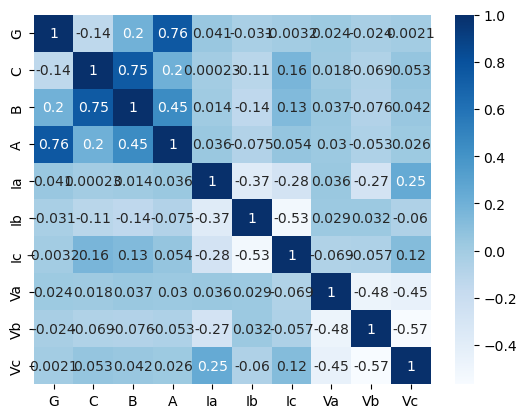

In [5]:
sns.heatmap(multi_data.corr(), annot=True, cmap='Blues')
plt.show()

In [6]:
multi_data['FaultType'] = multi_data['G'].astype(str) + multi_data['C'].astype(str) + multi_data['B'].astype(str) + multi_data['A'].astype(str)
multi_data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,FaultType
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


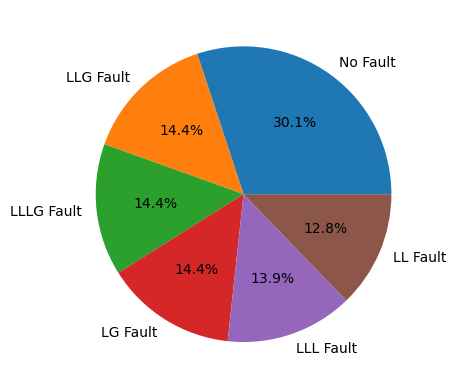

In [7]:
plt.pie(multi_data['FaultType'].value_counts(), autopct='%1.1f%%',labels=['No Fault', 'LLG Fault', 'LLLG Fault', 'LG Fault', 'LLL Fault', 'LL Fault'])
plt.show()

In [8]:
multi_data

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,FaultType
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0000
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0000
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0000
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0000


In [9]:
X=multi_data.iloc[:,4:10]

In [10]:
X

,Ia,Ib,Ic,Va,Vb,Vc
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...
7856,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [11]:
y=multi_data.iloc[:,-1]

In [12]:
y

0       1001
1       1001
2       1001
3       1001
4       1001
        ... 
7856    0000
7857    0000
7858    0000
7859    0000
7860    0000
Name: FaultType, Length: 7861, dtype: object

In [13]:
#Label encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([3, 3, 3, ..., 0, 0, 0])

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=0)

In [15]:
# KNeighbors Classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=15)

In [17]:
# Train the classifier on the training data

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [18]:
# make predictions on the test data

y_pred = knn_classifier.predict(X_test)

In [19]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

print("Classification Report :")
print(classification_report(y_test, y_pred))

print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))

Accuracy : 0.7838525111252383
Classification Report :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       469
           1       0.96      0.96      0.96       197
           2       0.34      0.35      0.34       223
           3       0.92      0.99      0.95       221
           4       0.93      0.93      0.93       219
           5       0.35      0.31      0.33       244

    accuracy                           0.78      1573
   macro avg       0.75      0.76      0.75      1573
weighted avg       0.78      0.78      0.78      1573

Confusion Matrix :
[[469   0   0   0   0   0]
 [  7 190   0   0   0   0]
 [  0   4  77   0   0 142]
 [  0   0   0 218   3   0]
 [  1   0   0  14 204   0]
 [  0   3 150   4  12  75]]


In [20]:
# XGBoost Classifier

In [21]:
# XGBoost

xgb_model = xgb.XGBClassifier(max_depth=20, random_state=24)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy :", xgb_accuracy)

XGBoost Accuracy : 0.8124602670057216


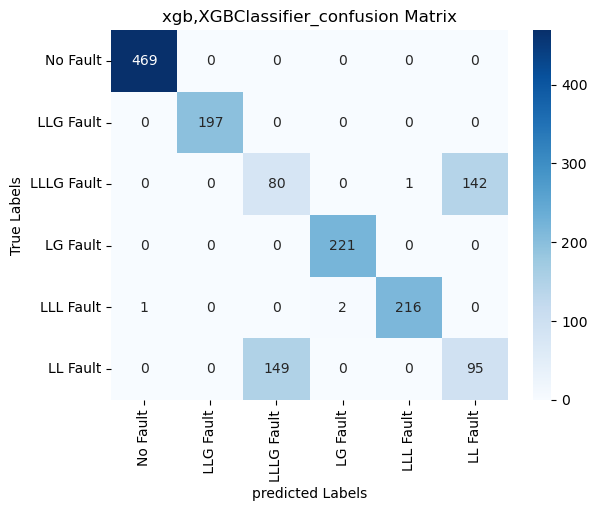

In [24]:
labels=['No Fault', ' LLG Fault', 'LLLG Fault', 'LG Fault', 'LLL Fault', 'LL Fault']
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, cmap='Blues', fmt='.4g', xticklabels=labels, yticklabels=labels)
plt.xlabel("predicted Labels")
plt.ylabel("True Labels")
plt.title("xgb,XGBClassifier_confusion Matrix")
plt.show()
plt.show()

In [25]:
print(f"Classification Report:\n{classification_report(y_test,y_pred_xgb,target_names=labels)}")

Classification Report:
              precision    recall  f1-score   support

    No Fault       1.00      1.00      1.00       469
   LLG Fault       1.00      1.00      1.00       197
  LLLG Fault       0.35      0.36      0.35       223
    LG Fault       0.99      1.00      1.00       221
   LLL Fault       1.00      0.99      0.99       219
    LL Fault       0.40      0.39      0.40       244

    accuracy                           0.81      1573
   macro avg       0.79      0.79      0.79      1573
weighted avg       0.81      0.81      0.81      1573



In [27]:
# dataset = pd.read_csv(filename)
A='No Fault'
B='LLG Fault'
C='LLLG Fault'
D='LG Fault'
E='LLL Fault'
F='LL Fault'
predict = xgb_model.predict(X_test.iloc[1:20,:])
for i in range(len(predict)):
    
    if predict[i] == 0:
        print("{} :{} ".format(multi_data.iloc[i,:],A))
        
    elif predict[i]== 1:
        print("{} :{} ".format(multi_data.iloc[i, :],B))
        
    elif predict[i]== 2:
        print("{} :{} ".format(multi_data.iloc[i, :],C))
        
    elif predict[i]== 3:
        print("{} :{} ".format(multi_data.iloc[i, :],D))
        
    elif predict[i]== 4:
        print("{} :{} ".format(multi_data.iloc[i, :],E))
        
    else:
        print("{} :{} ".format(multi_data.iloc[i, :],F))
        
    

G                     1
C                     0
B                     0
A                     1
Ia          -151.291812
Ib            -9.677452
Ic            85.800162
Va              0.40075
Vb            -0.132935
Vc            -0.267815
FaultType          1001
Name: 0, dtype: object :LLLG Fault 
G                     1
C                     0
B                     0
A                     1
Ia          -336.186183
Ib           -76.283262
Ic            18.328897
Va             0.312732
Vb            -0.123633
Vc            -0.189099
FaultType          1001
Name: 1, dtype: object :No Fault 
G                     1
C                     0
B                     0
A                     1
Ia          -502.891583
Ib          -174.648023
Ic           -80.924663
Va             0.265728
Vb            -0.114301
Vc            -0.151428
FaultType          1001
Name: 2, dtype: object :No Fault 
G                     1
C                     0
B                     0
A                     1
Ia      